# Funciones de distribución de probabilidades

## Distribución Uniforme

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
a = 1
b = 100
n = 1000000

data = np.random.uniform(a, b, n)

(array([100183.,  99532.,  99610., 100116.,  99920.,  99806., 100149.,
        100180., 100322., 100182.]),
 array([ 1.00005632, 10.90002696, 20.79999761, 30.69996825, 40.59993889,
        50.49990954, 60.39988018, 70.29985083, 80.19982147, 90.09979212,
        99.99976276]),
 <BarContainer object of 10 artists>)

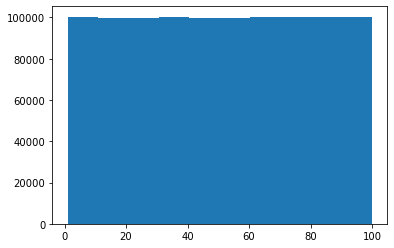

In [14]:
%matplotlib inline
plt.hist(data) 

## Distribución Normal

In [18]:
data = np.random.randn(1000000) ##Distribución normal standard 

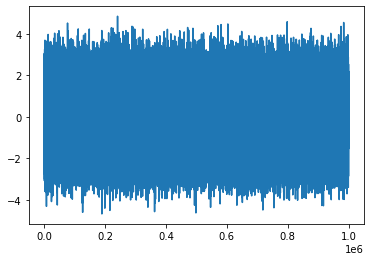

In [21]:
x = range(1, 1000001)
plt.plot(x, data)

(array([1.02000e+02, 2.74600e+03, 3.18200e+04, 1.59060e+05, 3.41299e+05,
        3.15578e+05, 1.25994e+05, 2.17730e+04, 1.55900e+03, 6.90000e+01]),
 array([-4.67047499, -3.71879315, -2.76711131, -1.81542946, -0.86374762,
         0.08793423,  1.03961607,  1.99129792,  2.94297976,  3.8946616 ,
         4.84634345]),
 <BarContainer object of 10 artists>)

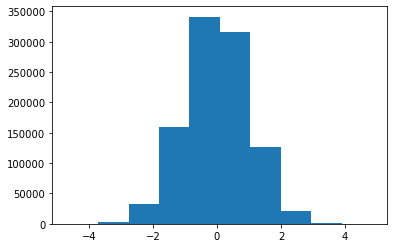

In [20]:
plt.hist(data)

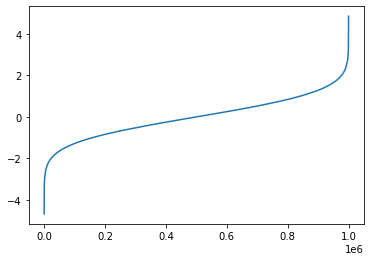

In [22]:
plt.plot(x, sorted(data))

(array([2.000e+00, 3.800e+01, 2.500e+02, 1.185e+03, 2.592e+03, 3.111e+03,
        1.997e+03, 6.930e+02, 1.190e+02, 1.300e+01]),
 array([-5.39469028, -3.33503714, -1.275384  ,  0.78426915,  2.84392229,
         4.90357544,  6.96322858,  9.02288172, 11.08253487, 13.14218801,
        15.20184115]),
 <BarContainer object of 10 artists>)

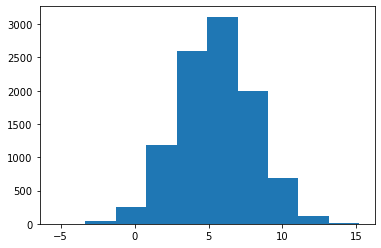

In [27]:
mu = 5.5
sd = 2.5
data = mu + sd * (np.random.randn(10000)) ## Z = (X - mu) / sd -> N(0,1), X = mu + sd * Z
plt.hist(data)

In [29]:
data = np.random.randn(2, 4)
data

array([[ 1.31448117,  0.508579  , -0.11254846, -2.45440226],
       [ 0.24842332, -1.86950384,  0.50626517,  0.72225713]])

### La simulación de Monte Carlo

* Generamos dos numeros aleatorios uniforme x e y entre 0 y 1
* Calcularemos x * x + y * y
 * si el valor es < 1 estamos dentro del circulo
 * si el valor es > 1 estamos fuera del circulo
* Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total de intentos para obtener una aproximación de la probabilidad de caer dentro del círculo
* Usamos dicha probabilidad para aproximar el valor de pi
repetimos el experimento un numero suficiente de veces, para obtener diferentes aproximaciones de pi
* Calculamos el promedio de los 1000 experimentos anetiores para dar un valor final de pi

In [36]:
def pi_montecarlo(n, n_exp):
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            if z <=1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/n_exp

    print(pi)
    fig = plt.plot(pi_value_list)
    return(pi, fig)

3.1411140000000004


(3.1411140000000004, [<matplotlib.lines.Line2D at 0xa46c718>])

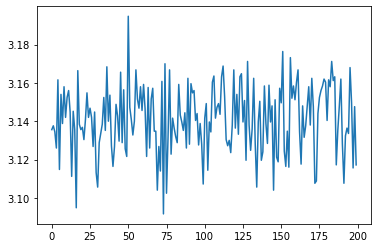

In [37]:
pi_montecarlo(10000, 200)

### Dummy Data Sets

In [4]:
n = 1000000
data = pd.DataFrame(
    {
        'A' : np.random.randn(n),
        'B' : 1.5 + 2.5 * np.random.randn(n),
        'C' : np.random.uniform(5, 32, n)
    }
)

In [5]:
data.head()

,A,B,C
0,1.403489,-2.221318,11.469819
1,0.319699,1.369917,12.220911
2,0.275402,0.914061,12.069399
3,-0.860879,3.212246,11.182030
4,1.300357,3.497464,19.246538


In [6]:
data.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,0.001857,1.498305,18.494359
std,1.001464,2.498345,7.792761
min,-4.723167,-10.502155,5.000016
25%,-0.674187,-0.187746,11.746981
50%,0.001679,1.498603,18.485675
75%,0.678110,3.183899,25.233598
max,4.476750,13.672744,32.000000


(array([7.50000e+01, 2.01400e+03, 2.26710e+04, 1.23511e+05, 3.01878e+05,
        3.35793e+05, 1.70795e+05, 3.91080e+04, 3.95900e+03, 1.96000e+02]),
 array([-4.7231675 , -3.80317571, -2.88318392, -1.96319214, -1.04320035,
        -0.12320856,  0.79678323,  1.71677501,  2.6367668 ,  3.55675859,
         4.47675038]),
 <BarContainer object of 10 artists>)

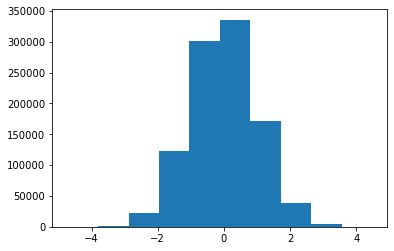

In [7]:
plt.hist(data["A"])

(array([6.30000e+01, 1.97600e+03, 2.67870e+04, 1.46675e+05, 3.38270e+05,
        3.28355e+05, 1.33337e+05, 2.29210e+04, 1.57100e+03, 4.50000e+01]),
 array([-10.50215485,  -8.084665  ,  -5.66717515,  -3.2496853 ,
         -0.83219546,   1.58529439,   4.00278424,   6.42027409,
          8.83776393,  11.25525378,  13.67274363]),
 <BarContainer object of 10 artists>)

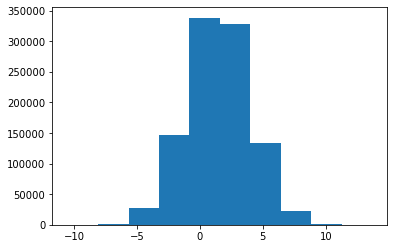

In [8]:
plt.hist(data["B"])

(array([100028.,  99943., 100270., 100115., 100184.,  99686., 100371.,
         99737.,  99766.,  99900.]),
 array([ 5.0000162 ,  7.70001455, 10.4000129 , 13.10001125, 15.8000096 ,
        18.50000795, 21.2000063 , 23.90000465, 26.600003  , 29.30000134,
        31.99999969]),
 <BarContainer object of 10 artists>)

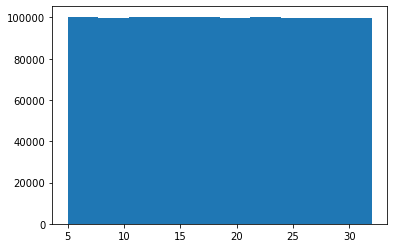

In [9]:
plt.hist(data["C"])

In [10]:
mainpath = "C:/Users/dguai/Documents/Courses/Machine Learning Data Science en Python/Practicas/Repositorios/Datasets"
data = pd.read_csv(mainpath + "/" + "Customer-churn-model/Customer Churn Model.txt")

In [11]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [12]:
column_names = data.columns.values.tolist()

In [13]:
a = len(column_names)
a

21

In [21]:
new_data = pd.DataFrame(
    {
        'Column Name' : column_names,
        'A' : np.random.randn(a),
        'B' : np.random.uniform(0, 1, a)
    }, index = range(42, 42 + a)
) 

In [22]:
new_data

,Column Name,A,B
42,State,-0.083576,0.822527
43,Account Length,1.643577,0.217537
44,Area Code,0.448407,0.810757
45,Phone,-1.699902,0.350176
46,Int'l Plan,-1.400214,0.880576
47,VMail Plan,-0.845263,0.885939
48,VMail Message,-1.262164,0.977143
49,Day Mins,-0.316112,0.204639
50,Day Calls,-0.777915,0.083474
51,Day Charge,0.290809,0.021291
